In [14]:
import ffn
%matplotlib inline
import matplotlib.pyplot as gu
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import talib
from talib import MA_Type
import requests
import io

In [15]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

# Q1. 畫出 Diamond Shape

In [16]:
n = 9
for a1 in range(1, (n+1)//2 + 1): #from row 1 to 5
    for a2 in range((n+1)//2 - a1):
        print(" ", end = "")
    for a3 in range((a1*2)-1):
        print("*", end = "")
    print()

for a1 in range((n+1)//2 + 1, n + 1): #from row 6 to 9
    for a2 in range(a1 - (n+1)//2):
        print(" ", end = "")
    for a3 in range((n+1 - a1)*2 - 1):
        print("*", end = "")
    print()

    *
   ***
  *****
 *******
*********
 *******
  *****
   ***
    *


In [17]:
def paintleaves(m):
    for i in range(m):
        if(i == 10):
            print( ' '*(m-i) + '*'*( 2*i + 1-len( 'Mr.Gao Merry Christmas')) + 'Mr.Gao Merry Christmas'+ ' '*(m-i))
            continue
        if(i == 20):
            print( ' '*(m-i) + '*'*( 2*i + 1-len( 'Merry Christmas')) +'Merry Christmas'+ ' '*(m-i))
            continue
        if(i == m-1):
            print( ' '*(m-i) + 'Merry Christmas'+ '*'*( 2*i + 1-len( 'Merry Christmas')) + ' '*(m-i))
            continue
        print(' '*(m-i) + '*'*(2*i + 1) + ' '*(m-i))   

def paintTrunk(n):
    for j in range (8 ):
       print(' '*(n - 5) + '*'*10 + ' '*(n - 5))

paintleaves(35)
paintTrunk(35)

                                   *                                   
                                  ***                                  
                                 *****                                 
                                *******                                
                               *********                               
                              ***********                              
                             *************                             
                            ***************                            
                           *****************                           
                          *******************                          
                         Mr.Gao Merry Christmas                         
                        ***********************                        
                       *************************                       
                      ***************************              

# Q2. 刪除重複性資料

從 symbols01.txt 跟 symbols02.txt 讀入兩組股票代號，合併兩組代號，輸出一份無重複的股票代號到 symbols03.txt。

In [18]:
with open ('symbols01.txt','r') as f:
    a=f.read()
    a=a.strip().split("\n")

In [19]:
with open ('symbols02.txt','r') as f:
    b=f.read()
    b=b.strip().split("\n")

In [20]:
set_01 = set(a)

In [21]:
set_02 = set(b)

In [22]:
set_03= (set_01|set_02)
symbols03=list(set_03)

In [23]:
with open ('symbols03.txt','w') as f:
    for symbol in symbols03:
        f.write(symbol.strip().upper()+"\n")

# Q3. 下載台灣上市公司基本資料

寫一個程式從 [http://dts.twse.com.tw/opendata/t187ap03_L.csv](http://dts.twse.com.tw/opendata/t187ap03_L.csv) 下載台灣上市公司基本資料，並輸出成 pandas dataframe。

In [24]:
r=requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")
r.encoding="big5"
hi=r.text.split("\r\n")

hi= io.StringIO(r.text)
TSE_hi = pd.read_csv(hi,skiprows=1,index_col=False)
TSE_hi.head()

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
0,1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,...,0.0,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com
1,1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,...,0.0,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw
2,1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,...,0.0,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw
3,1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,...,0.0,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com
4,1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,...,0.0,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw


# Q4. 畫出技術曲線

請畫出除了上課提過的線型之外的任何技術曲線，並寫註解說明。

In [28]:
#匯入
df = data['GOOG']

In [29]:
df

,Open,High,Low,Close,Adj Close,Volume,12d,30d
Date,,,,,,,,
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900,NaN,NaN
2016-01-04,743.000000,744.059998,731.257996,741.840027,741.840027,3272800,NaN,NaN
2016-01-05,746.450012,752.000000,738.640015,742.580017,742.580017,1950700,NaN,NaN
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,NaN,NaN
2016-01-07,730.309998,738.500000,719.059998,726.390015,726.390015,2963700,NaN,NaN
2016-01-08,731.450012,733.229980,713.000000,714.469971,714.469971,2450900,NaN,NaN
2016-01-11,716.609985,718.854980,703.539978,716.030029,716.030029,2089300,NaN,NaN
2016-01-12,721.679993,728.750000,717.317017,726.070007,726.070007,2024500,NaN,NaN
2016-01-13,730.849976,734.739990,698.609985,700.559998,700.559998,2501700,NaN,NaN


In [32]:
df['12d'] = pd.Series.rolling(df['Close'], window=12).mean()  #計算12日與26日移動平均線
df['30d'] = pd.Series.rolling(df['Close'], window=30).mean()
df['dif'] = df['12d'] - df['30d']                             #將12d與26d相減作為dif
df['DEM'] = pd.Series.rolling(df['dif'],window=9).mean()      #根據MACD定義，將dif取9日移動平均得到DEM
df['MACDbar'] = df['dif'] - df['DEM']                         #MACD就是dif與DEM的差

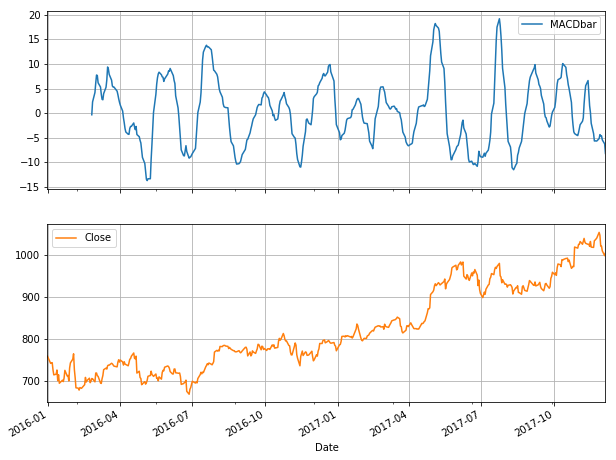

In [33]:
df[['MACDbar','Close']].plot(subplots = True,figsize= (10,8),grid=True) #畫出MACD與AAPL股價收盤價進行比較
gu.legend(loc='best')

# Q5. 策略回測

In [34]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [35]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [36]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [37]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [38]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [43]:
# 定義你的策略

def M064810015_strategy(df):
   #使用 k線來判斷進場訊號
    has_position = False
    df['signals'] = 0
    df['MA5'] = talib.MA(df['Close'].values,5,matype=0)
    df['MA20'] = talib.MA(df['Close'].values,20,matype=0)   #使用日線和月線是否黃金交叉來做進場訊號
    df['Vol5'] = np.round(pd.Series.rolling(df['Volume'], window=10).mean(), 2)
    df['DIF'], df['MACD'], df['OSC'] = talib.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
    #
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['MA5'][t-1] and df['MA5'][t-1] > df['MA20'][t-1] and df['MA5'][t-2] < df['MA20'][t-2] and df['DIF'][t-1] > df['MACD'][t-1] and df['Volume'][t] > df['Vol5'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['MA5'][t-1] and df['Volume'][t] > df['Vol5'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False
    

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [44]:
def apply_strategy(strategy, df):
    return strategy(df)

In [45]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, 學號_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, M064810015_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


Symbol: CSML 使用 M064810015_strategy 策略沒有出現買賣訊號。


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Error occurs at symbol: ISRL Strategy: M064810015_strategy ==> ("'NoneType' object is not subscriptable",)
Symbol: PSC 使用 M064810015_strategy 策略沒有出現買賣訊號。


In [46]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [47]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.102787,-0.231763,426,0.984521,705,20,TICC,BBands_strategy
3,3.143986,-0.085222,205,1.121597,705,3,TICC,M064810015_strategy
4,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy


In [48]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
72,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
17,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
82,-1.271733,-0.006596,3,0.997891,705,1,TCRD,M064810015_strategy
66,-6.675942,-0.009777,7,0.992794,384,1,SCAC,M064810015_strategy
73,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy


In [49]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
9,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
14,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
77,2.136744,-0.454342,191,2.400221,705,21,BBGI,BBands_strategy
42,2.174489,-0.486039,157,2.365420,705,2,NLNK,M064810015_strategy
5,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy


In [50]:
results_df.sort_values('returns',ascending=False)

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
9,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
14,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
77,2.136744,-0.454342,191,2.400221,705,21,BBGI,BBands_strategy
42,2.174489,-0.486039,157,2.365420,705,2,NLNK,M064810015_strategy
5,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy
89,1.724711,-0.231083,481,1.717758,704,20,ISRL,BBands_strategy
57,1.603227,-0.262472,162,1.704982,705,21,CDXS,BBands_strategy
26,2.335616,-0.085147,103,1.642964,705,21,RICK,BBands_strategy
4,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy
24,1.498608,-0.225873,161,1.590620,705,13,RICK,Breakout_strategy
